<a href="https://colab.research.google.com/github/Virajbiz98/Python_Learning/blob/main/LangGraph/langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install langgraph -q

Simple Graph

In [20]:
from typing import TypedDict

In [22]:
class Agentstate(TypedDict):
  name : str
  age : int
  message : str

In [32]:
def hello_name(state : Agentstate)-> Agentstate:
  state['message'] = f"Hello {state['name']}"
  return state

def hello_age(state : Agentstate)-> Agentstate:
  state['message'] = f"{state['message']} Your Age is {state['age']}"
  return state

In [33]:
from langgraph.graph import StateGraph, START, END

In [37]:
workflow = StateGraph(Agentstate)

workflow.add_node("hello_name", hello_name)
workflow.add_node("hello_age", hello_age)

workflow.add_edge(START, "hello_name")
workflow.add_edge("hello_name", "hello_age")
workflow.add_edge("hello_age", END)

app = workflow.compile()

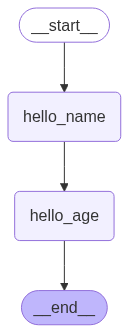

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
result = app.invoke({"name":"kasun","age": "34"})
print(result['message'])

Hello kasun Your Age is 34
